In [3]:
import numpy as np # Númerica
import matplotlib.pyplot as plt # Gráficas
from scipy.interpolate import CubicSpline, lagrange, interp1d # Interpolación
from scipy.integrate import quad, dblquad, tplquad, trapezoid, simpson # Integración
import sympy as sp # Símbolos

# ⚠ Importante

👁 Puede usar unicamente las librerias vistas en clase (estas están en la parte superior) en caso de agregar una nueva, debe justificarla.

💀 No está permitido el uso de IA's en caso de hacerlo su parcial será **anulado**!

❗ Comente su código y funciones, esto hace parte de la nota.

✅ Responda ordenadamente y con claridad.


### Nombre: Miguel Angel Perdomo Gaitan

# 1

**(30 puntos)** Sea la función $f(x) = 3^x$,

---

a. Defina una función llamada derivada (ver abajo) que encuentre el valor de la derivada en $x=2$ usando diferencias finitas centrales,

$$
f'(x) ≈ \frac{f(x+h) - f(x-h)}{2h}
$$

con una tolerancia menor a $10^{-8}$ y que retorne el valor de $f'(x=2)$ para cada valor de $h$. Tome con $h$ inicial 0.1.

---

b. Realice un gráfico logaritmico del error absoluto asociado a $f'(x)$ en función de $h$, conociendo que

$$
\frac{d}{dx}(b^x) = b^x\ln b
$$





```python
def derivada(f,x, tol = 1e-8):
'''
Recuerde hacer su documentación
'''

  return valor_derivada, h_valores
```



In [124]:
 def derivada(f,x,tol=1e-7):
  """
  Determina la derivada usando diferencias centrales
  con una tolerancia dada por el usuario
  Entradas:
  f: función (callable)
  x: punto a evaluar la derivada (float)
  tol: tolerancia permitida (float)
  Salida:
  Derivada en el punto x con la tolerancia deseada
  """
  #se guarda el error de cada h usando una lista
  errores=[]
  fprime_0=0 #se crea una segunda variable incializada en cero para comparar la derivada en cada h
  #se crea lista de h
  hs=np.linspace(1e-10,0.1,1000)[::-1] #se invierte el orden para que al emplear el ciclo for comience con el mayor de los h
  #se incializa un ciclo for
  for h in hs:
    #se emplea diferencias centrales para determinar la derivada
    fprime_1=(f(x+h)-f(x-h))/(2*h)
    #se determina el error
    error=abs(fprime_1-fprime_0)
    #se guarda el error en una lista
    errores.append(error)
    #se condiciona a que si error es menor que la tolerancia imprima el resultado
    if error<tol:
      #se retorna la derivada
      return fprime_1
    #se reinicia el bucle
    fprime_0=fprime_1


In [127]:
#se declara f
f =lambda x: 3**x
#se determina la derivada usando la función anterior
d_f=derivada(f,2)
print(d_f)

9.8875106777312


In [122]:
#se realiza el punto b
#declaración de la derivada de f
derivada_f=lambda x: (3**x)*np.log(3)
#punto a derivar
x=2
#se evalúa la derivada exacta
derivada_exacta=derivada_f(x)
#se emplea el código del punto a pero modificándolo
#se guarda el error de cada h usando una lista
errores=[]
#se crea lista de h
hs=np.linspace(1e-10,0.1,1000)[::-1] #se invierte el orden para que al emplear el ciclo for comience con el mayor de los h
  #se incializa un ciclo for
for h in hs:
    #se emplea diferencias centrales para determinar la derivada
    fprime=(f(x+h)-f(x-h))/(2*h)
    #se determina el error
    error=abs(fprime-derivada_exacta)
    #se guarda el error en una lista
    errores.append(error)
    #se condiciona a que si error es menor que la tolerancia imprima el resultado

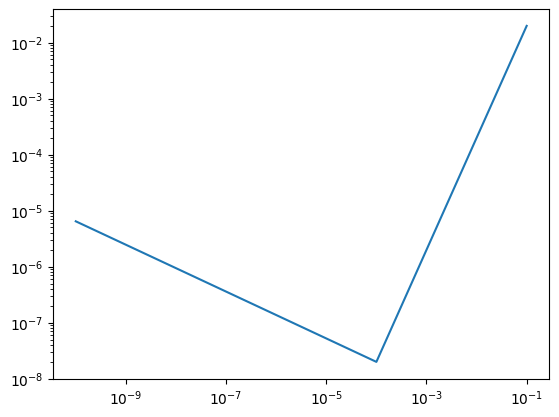

In [129]:
#se grafica el error
plt.loglog(hs,errores)
plt.show()

En mi caso, nunca se pudo cumplir if error<tol: imprima el resultado por ello se modificó la tolerancia a 1e-7

## 2

**(40 puntos)** Considere un fluido viscoso que fluye en régimen laminar a través de una tubería cilíndrica horizontal de radio $R = 1.0\ \text{cm}$. Se ha medido experimentalmente la velocidad axial del fluido en distintos radios desde el centro de la tubería ($r = 0$) hasta la pared ($r = R$). Los datos obtenidos son:

| $r$ (cm) | $v(r)$ (cm/s) |
|----------|---------------|
| 0.0      | 2.00          |
| 0.2      | 1.92          |
| 0.4      | 1.68          |
| 0.6      | 1.28          |
| 0.8      | 0.72          |
| 1.0      | 0.00          |

Con base en estos datos responda:

---

**a.** Encuentre una expresión para el polinomio interpolador de **Lagrange** para $v(r)$.

---

**b.** Usando las funciones obtenidas por **Lagrange** y **CubicSpline**, haga un gráfico donde se muestre el comportamiento de ambas interpolaciones, comparándolas con los datos experimentales.

---

**c.** Calcule la derivada $\frac{dv}{dr}$, correspondiente al **gradiente de velocidad radial** usando los datos procedentes de la interpolación CubicSpline. Use `np.gradient` con $h = 10^{-4}$.

---

**d.** Determine el **esfuerzo cortante** en el fluido, dado por:

$$
\tau(r) = \mu \frac{dv}{dr},
$$

donde $\mu = 0.001\ \text{Pa}\cdot\text{s}$ es la viscosidad dinámica del fluido. Grafique $\tau(r)$ para $r \in [0, 1]$.

---



In [8]:
#punto a
#se crea un array con los datos
r=np.array([0.0,0.2,0.4,0.6,0.8,1.0]) #radio
v=np.array([2,1.92,1.68,1.28,0.72,0.0]) #velocidad
#se interpola usando lagrange
poly_lagrange=lagrange(r,v) #polinomio de lagrange
#se interpola usando CubicSpline
poly_cubicspline=CubicSpline(r,v) #polinomio de CubicSpline

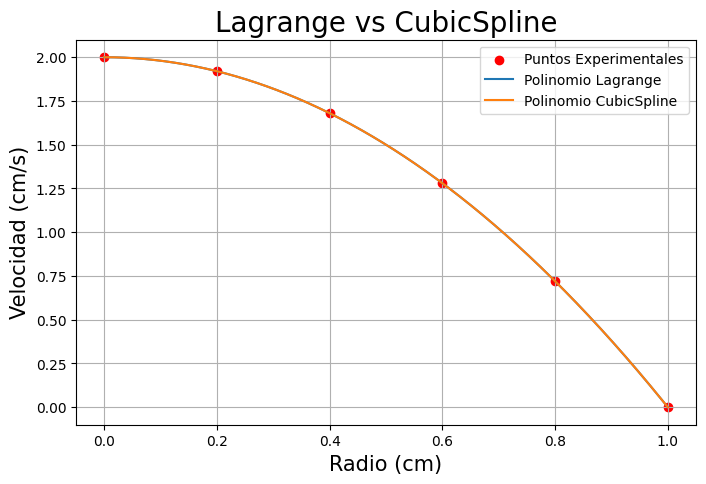

In [10]:
#punto b
#gráfico
plt.figure(figsize=(8,5))
plt.scatter(r,v, label="Puntos Experimentales", color="red")
#se crea un arreglo de r_interp
r_interp=np.linspace(0,np.max(r),1000)
plt.plot(r_interp,poly_lagrange(r_interp), label="Polinomio Lagrange") #gráfica de lagrange
plt.plot(r_interp,poly_cubicspline(r_interp),label="Polinomio CubicSpline") #gráfica de CubicSpline
plt.title("Lagrange vs CubicSpline", fontsize=20)
plt.xlabel("Radio (cm)",fontsize=15)
plt.ylabel("Velocidad (cm/s)",fontsize=15)
plt.legend()
plt.grid()
plt.show()

In [16]:
#punto c
#se declara el h
h=1e-4
#arreglo h espaciado
r_interpolar=np.arange(0,np.max(r),h)
#se evalua con CubicSpline
v_interp=poly_cubicspline(r_interpolar)
#se emplea numpy.gradient para encontrar la derivada con ese paso
derivada_v=np.gradient(r_interpolar,v_interp)
#se imprime los valores de derivada
print(derivada_v)

[-4.99999997e+03 -4.16666664e+03 -1.41666667e+03 ... -2.50075024e-01
 -2.50050011e-01 -2.50037506e-01]


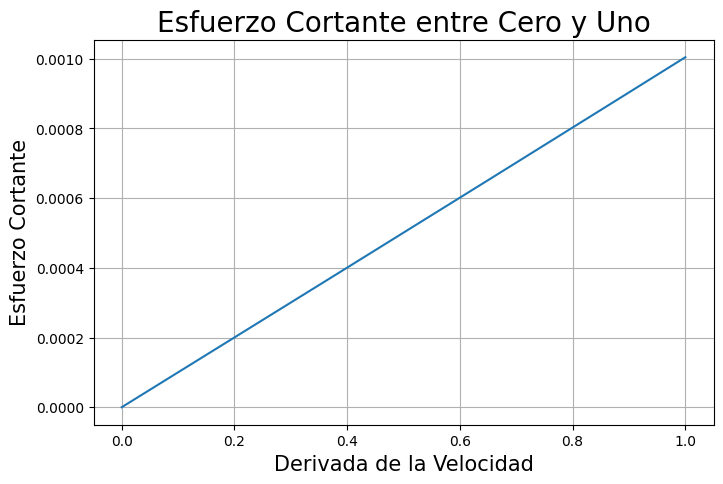

In [20]:
#punto d
#se declara la velocidad dinámica del fluido
miu=0.001 #Pa*s
#se calcula el esfuerzo cortante con la derivada de velocidad
esfuerzo_cortante=miu*derivada_v
#interpolo los esfuerzo cortante usando CubicSpline
poly_esfuerzo_cortante=CubicSpline(derivada_v,esfuerzo_cortante)
#se realiza la gráfica de los datos
r_01=np.linspace(0,1,1000) #array de r entre cero y uno
#se realiza la gráfica
plt.figure(figsize=(8,5))
plt.plot(r_01,poly_esfuerzo_cortante(r_01),label="Esfuerzo Cortante")
plt.title("Esfuerzo Cortante entre Cero y Uno",fontsize=20)
plt.xlabel("Derivada de la Velocidad", fontsize=15)
plt.ylabel("Esfuerzo Cortante",fontsize=15)
plt.grid()
plt.show()

# 3

**(30 puntos)** Considere un sólido tetraédrico $R$ delimitado por los planos:

- $x = 0$, $y = 0$, $z = 0$,  
- y el plano $x + y + z = 1$.

Este sólido ocupa una región en el primer octante y está contenido completamente dentro del cubo unidad.

La densidad del sólido es variable y está dada por $\rho(x, y, z) = xyz$ [kg/m³].

Considere:


$$
\iiint_R f(x,y,z)\, dV = \int_0^1 \int_0^{1-x} \int_0^{1-x-y} f(x,y,z)\, dz\, dy\, dx
$$

con

$$
dV = dz\,dy\,dx
$$

---

a. Calcule la **masa total** del sólido:

$$
m = \iiint_R \rho(x, y, z)\, dV.
$$

Usando la forma iterativa de `quad`, compare su resultado con `tplquad`.

---

b. Calcule el **momento de inercia respecto a los ejes $x$ y $z$**, definidos como:

$$
I_z = \iiint_R (x^2 + y^2)\, \rho(x, y, z)\, dV.
$$

$$
I_x = \iiint_R (y^2 + z^2)\, \rho(x, y, z)\, dV.
$$

Puede usar la forma iterativa de `quad` o `tplquad`.





In [24]:
def integrando_interior(x,y):
  """
  Determina la integral más interna del punto número 3,
  subpunto a del parcial
  Entradas:
  x: variable de la función densidad ~ Float
  y:Variable de la función densidad ~ Float
  Salida:
  Retorna la integral respecto z
  """
  integrando=lambda z: x*y*z
  integral,_=quad(integrando,0,1-x-y)
  return integral
def integral_intermedia(x):
  """
  Calcula la intergral intermedia de la integral triple del punto número 3,
  subpunto a del parcial
  Entrada:
  x: variable de la función densidad ~ float
  Salida:
  Retorna la integral respecto a y
  """
  integrando=lambda y:integrando_interior(x,y)
  integral,_=quad(integrando,0,1-x)
  return integral
#se realiza la integral más externa
integral,_=quad(integral_intermedia,0,1)
#se imprime el resultado
print(f"La masa total del sólido es: {integral:.4f} kg")

La masa total del sólido es: 0.0014 kg


In [30]:
#se realiza el punto a usando tplquad
#se declara la función
f=lambda z,y,x: x*y*z
#límite de integración de x
a=0
b=1
#límites de integración de y
g= lambda x: 0
h=lambda x: 1-x
#límites de integración de z
q= 0
r=lambda x,y: 1-x-y
integral_quad,__=tplquad(f,a,b,g,h,q,r)
print(f"La masa total del sólido es: {integral_quad:.4f}")

La masa total del sólido es: 0.0014


In [37]:
#Punto B
#se emplea la forma iterativa de quad para determinar el momento de inercia
#Momento de intercia en Z
def integrando_interior_inercia_z(x,y):
  """
  Determina la integral más interna del punto número 3,
  subpunto b del parcial
  Entradas:
  x: variable de la función densidad ~ Float
  y:Variable de la función densidad ~ Float
  Salida:
  Retorna la integral respecto z
  """
  integrando=lambda z: (x*y*z)*(x**2 + y**2)
  integral,_=quad(integrando,0,1-x-y)
  return integral
def integral_intermedia_inercia_z(x):
  """
  Calcula la intergral intermedia de la integral triple del punto número 3,
  subpunto a del parcial
  Entrada:
  x: variable de la función densidad ~ float
  Salida:
  Retorna la integral respecto a y
  """
  integrando=lambda y:integrando_interior_inercia_z(x,y)
  integral,_=quad(integrando,0,1-x)
  return integral
#se realiza la integral más externa
integral_inercia_z,_=quad(integral_intermedia_inercia_z,0,1)
#se imprime el resultado
print(f"El momento de Inercia en z del sólido es: {integral_inercia_z:.4f} kg")


El momento de Inercia en z del sólido es: 0.0003 kg


In [38]:
#Ahora se determina el momento de incercia del sólido en x
def integrando_interior_inercia_x(x,y):
  """
  Determina la integral más interna del punto número 3,
  subpunto b del parcial
  Entradas:
  x: variable de la función densidad ~ Float
  y:Variable de la función densidad ~ Float
  Salida:
  Retorna la integral respecto z
  """
  integrando=lambda z: (x*y*z)*(y**2 + z**2)
  integral,_=quad(integrando,0,1-x-y)
  return integral
def integral_intermedia_inercia_x(x):
  """
  Calcula la intergral intermedia de la integral triple del punto número 3,
  subpunto a del parcial
  Entrada:
  x: variable de la función densidad ~ float
  Salida:
  Retorna la integral respecto a y
  """
  integrando=lambda y:integrando_interior_inercia_x(x,y)
  integral,_=quad(integrando,0,1-x)
  return integral
#se realiza la integral más externa
integral_inercia_x,_=quad(integral_intermedia_inercia_x,0,1)
#se imprime el resultado
print(f"El momento de Inercia en x del sólido es: {integral_inercia_x:.4f} kg")


El momento de Inercia en x del sólido es: 0.0003 kg
